<a href="https://colab.research.google.com/github/Spandana365/3_Bias-Busters/blob/main/unbiased_rand_for_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()  # Opens a file upload dialog

Saving dataset_with_gender (1) (1).csv to dataset_with_gender (1) (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("dataset_with_gender (1) (1).csv")  # Load the dataset
df.head(10)  # Read the first 10 rows

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100),Gender
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100,female
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100,male
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70,male
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95,female
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100,female
5,6,Samantha Santos,"Cybersecurity, Networking, Linux, Ethical Hacking",10,M.Tech,AWS Certified,Cybersecurity Analyst,Reject,66208,9,100,female
6,7,Tony Smith,"Networking, Cybersecurity, Ethical Hacking, Linux",10,M.Tech,AWS Certified,Cybersecurity Analyst,Hire,66208,9,100,male
7,8,Anthony Harrison,"TensorFlow, Pytorch, NLP",3,M.Tech,AWS Certified,AI Researcher,Hire,103006,7,90,male
8,9,Nancy Jenkins,"Networking, Ethical Hacking",7,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,92270,3,100,female
9,10,Courtney Gibson,"Python, TensorFlow, Pytorch, NLP",0,M.Tech,AWS Certified,AI Researcher,Reject,60579,1,35,female


In [ ]:
# Selecting relevant features (Update based on your actual column names)
df = df[['Experience (Years)', 'Skills', 'Job Role', 'Education', 'Gender', 'Recruiter Decision', 'AI Score (0-100)']]
'''
# Convert categorical variables to numerical values
df.loc[:,'Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.loc[:,'Education'] = df['Education'].astype('category').cat.codes
'''
# Define input features (X) and target output (y)
X = df.drop(columns=['Recruiter Decision'])  # Features
y = df['Recruiter Decision']  # Target

# Verify dataset structure
print("Feature Matrix Shape:", X.shape)
print("Target Variable Shape:", y.shape)

Feature Matrix Shape: (1000, 6)
Target Variable Shape: (1000,)


In [ ]:
# Display first few rows
print(df.head())

# Display column names
print("Dataset Columns:", df.columns)

   Experience (Years)                                        Skills  \
0                  10                      TensorFlow, NLP, Pytorch   
1                  10  Deep Learning, Machine Learning, Python, SQL   
2                   1         Ethical Hacking, Cybersecurity, Linux   
3                   7                   Python, Pytorch, TensorFlow   
4                   4                              SQL, React, Java   

                Job Role Education  Gender Recruiter Decision  \
0          AI Researcher      B.Sc  female               Hire   
1         Data Scientist       MBA    male               Hire   
2  Cybersecurity Analyst       MBA    male               Hire   
3          AI Researcher    B.Tech  female               Hire   
4      Software Engineer       PhD  female               Hire   

   AI Score (0-100)  
0               100  
1               100  
2                70  
3                95  
4               100  
Dataset Columns: Index(['Experience (Years)', 'Ski

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=100)  # Extract top 100 important skill features

# Convert "Skills" column into numerical format
skills_matrix = vectorizer.fit_transform(df['Skills'].fillna('')).toarray()

# Convert to DataFrame
skills_df = pd.DataFrame(skills_matrix, columns=vectorizer.get_feature_names_out())

# Drop original text column and merge with the main dataset
df = df.drop(columns=['Skills']).reset_index(drop=True)
df = pd.concat([df, skills_df], axis=1)

print("Dataset after TF-IDF on Skills:", df.head())

Dataset after TF-IDF on Skills:    Experience (Years)               Job Role Education  Gender  \
0                  10          AI Researcher      B.Sc  female   
1                  10         Data Scientist       MBA    male   
2                   1  Cybersecurity Analyst       MBA    male   
3                   7          AI Researcher    B.Tech  female   
4                   4      Software Engineer       PhD  female   

  Recruiter Decision  AI Score (0-100)  cybersecurity      deep   ethical  \
0               Hire               100       0.000000  0.000000  0.000000   
1               Hire               100       0.000000  0.399911  0.000000   
2               Hire                70       0.512648  0.000000  0.491221   
3               Hire                95       0.000000  0.000000  0.000000   
4               Hire               100       0.000000  0.000000  0.000000   

    hacking  ...  learning     linux   machine  networking       nlp  \
0  0.000000  ...  0.000000  0.000000

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
job_role_encoder = LabelEncoder()

# Convert "Job Role" column into numeric values
df["Job Role"] = job_role_encoder.fit_transform(df["Job Role"])

# Print the mapping
job_role_mapping = dict(zip(job_role_encoder.classes_, job_role_encoder.transform(job_role_encoder.classes_)))
print("Job Role Mapping:", job_role_mapping)


Job Role Mapping: {'AI Researcher': 0, 'Cybersecurity Analyst': 1, 'Data Scientist': 2, 'Software Engineer': 3}


In [ ]:
# Convert text to lowercase and remove extra spaces
df["Recruiter Decision"] = df["Recruiter Decision"].str.strip().str.lower()

# Check unique values after cleaning
print(df["Recruiter Decision"].unique())

df["Recruiter Decision"] = df["Recruiter Decision"].map({"hire": 1, "reject": 0})

['hire' 'reject']


In [ ]:
# Standardize Gender values (remove spaces, lowercase everything)
df["Gender"] = df["Gender"].str.strip().str.lower()

# Map Gender values to numbers
df["Gender"] = df["Gender"].map({"male": 0, "female": 1})

# Force convert to float (if required)
df["Gender"] = df["Gender"].astype(float)

print("\nData Types After Gender Conversion:\n", df.dtypes)


Data Types After Gender Conversion:
 Experience (Years)      int64
Job Role                int64
Education              object
Gender                float64
Recruiter Decision      int64
AI Score (0-100)        int64
cybersecurity         float64
deep                  float64
ethical               float64
hacking               float64
java                  float64
learning              float64
linux                 float64
machine               float64
networking            float64
nlp                   float64
python                float64
pytorch               float64
react                 float64
sql                   float64
tensorflow            float64
dtype: object


In [ ]:

print("Unique Education Values:", df["Education"].unique())

Unique Education Values: ['B.Sc' 'MBA' 'B.Tech' 'PhD' 'M.Tech']


In [ ]:
# Standardize Education values (remove spaces, convert to uppercase)
df["Education"] = df["Education"].str.strip().str.upper()

# Define mapping
education_mapping = {
    "B.SC": 0,
    "B.TECH": 1,
    "MBA": 2,
    "M.TECH": 3,
    "PHD": 4
}

# Apply mapping to convert text into numbers
df["Education"] = df["Education"].map(education_mapping)

# Convert to integer type
df["Education"] = df["Education"].astype(int)

print("\nConverted Education Column:\n", df["Education"].head(10))
print("\nData Types After Conversion:\n", df.dtypes)


Converted Education Column:
 0    0
1    2
2    2
3    1
4    4
5    3
6    3
7    3
8    2
9    3
Name: Education, dtype: int64

Data Types After Conversion:
 Experience (Years)      int64
Job Role                int64
Education               int64
Gender                float64
Recruiter Decision      int64
AI Score (0-100)        int64
cybersecurity         float64
deep                  float64
ethical               float64
hacking               float64
java                  float64
learning              float64
linux                 float64
machine               float64
networking            float64
nlp                   float64
python                float64
pytorch               float64
react                 float64
sql                   float64
tensorflow            float64
dtype: object


In [ ]:
print("Unique gender Values:", df["Gender"].unique())

Unique gender Values: [1. 0.]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define input features (X) and target output (y)
X = df.drop(columns=['Recruiter Decision'])  # Features
y = df['Recruiter Decision']  # Target

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Save the trained model
import joblib
joblib.dump(rf_model, "trained_hiring_model.pkl")

print("Model Training Complete! Saved as trained_hiring_model.pkl")

y_pred = rf_model.predict(X_test)

Model Training Complete! Saved as trained_hiring_model.pkl


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Model Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [ ]:
print("Feature Names Used During Training:")
print(X_train.columns.tolist())  # Displays all 23 feature names
print("\nNumber of Features Expected:", rf_model.n_features_in_)  # Should print 23

print("Feature Names in X_train:")
print(X_train.columns.tolist())  # Shows all column names


Feature Names Used During Training:
['Experience (Years)', 'Job Role', 'Education', 'Gender', 'AI Score (0-100)', 'cybersecurity', 'deep', 'ethical', 'hacking', 'java', 'learning', 'linux', 'machine', 'networking', 'nlp', 'python', 'pytorch', 'react', 'sql', 'tensorflow']

Number of Features Expected: 20
Feature Names in X_train:
['Experience (Years)', 'Job Role', 'Education', 'Gender', 'AI Score (0-100)', 'cybersecurity', 'deep', 'ethical', 'hacking', 'java', 'learning', 'linux', 'machine', 'networking', 'nlp', 'python', 'pytorch', 'react', 'sql', 'tensorflow']


In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame with all features set to 0
male_candidate = pd.DataFrame(np.zeros((1, X_train.shape[1])), columns=X_train.columns)
female_candidate = pd.DataFrame(np.zeros((1, X_train.shape[1])), columns=X_train.columns)

# Assign identical qualifications
for candidate in [male_candidate, female_candidate]:
    candidate["Experience (Years)"] = 10
    candidate["AI Score (0-100)"] = 100
    candidate["Education"] = 3
    candidate["Job Role"] = 1
    candidate["linux"] = 1


# Set Gender (0 = Male, 1 = Female)
male_candidate["Gender"] = 0
female_candidate["Gender"] = 1

# Print candidate details
print("Male Candidate:\n", male_candidate)
print("\nFemale Candidate:\n", female_candidate)

Male Candidate:
    Experience (Years)  Job Role  Education  Gender  AI Score (0-100)  \
0                  10         1          3       0               100   

   cybersecurity  deep  ethical  hacking  java  learning  linux  machine  \
0            0.0   0.0      0.0      0.0   0.0       0.0      1      0.0   

   networking  nlp  python  pytorch  react  sql  tensorflow  
0         0.0  0.0     0.0      0.0    0.0  0.0         0.0  

Female Candidate:
    Experience (Years)  Job Role  Education  Gender  AI Score (0-100)  \
0                  10         1          3       1               100   

   cybersecurity  deep  ethical  hacking  java  learning  linux  machine  \
0            0.0   0.0      0.0      0.0   0.0       0.0      1      0.0   

   networking  nlp  python  pytorch  react  sql  tensorflow  
0         0.0  0.0     0.0      0.0    0.0  0.0         0.0  


In [ ]:
# Predict hiring decisions
male_decision = rf_model.predict(male_candidate)
female_decision = rf_model.predict(female_candidate)

# Print results
print("Male Candidate Prediction:", "Hired" if male_decision[0] == 1 else "Not Hired")
print("Female Candidate Prediction:", "Hired" if female_decision[0] == 1 else "Not Hired")


Male Candidate Prediction: Hired
Female Candidate Prediction: Hired


In [ ]:
!pip install shap matplotlib seaborn

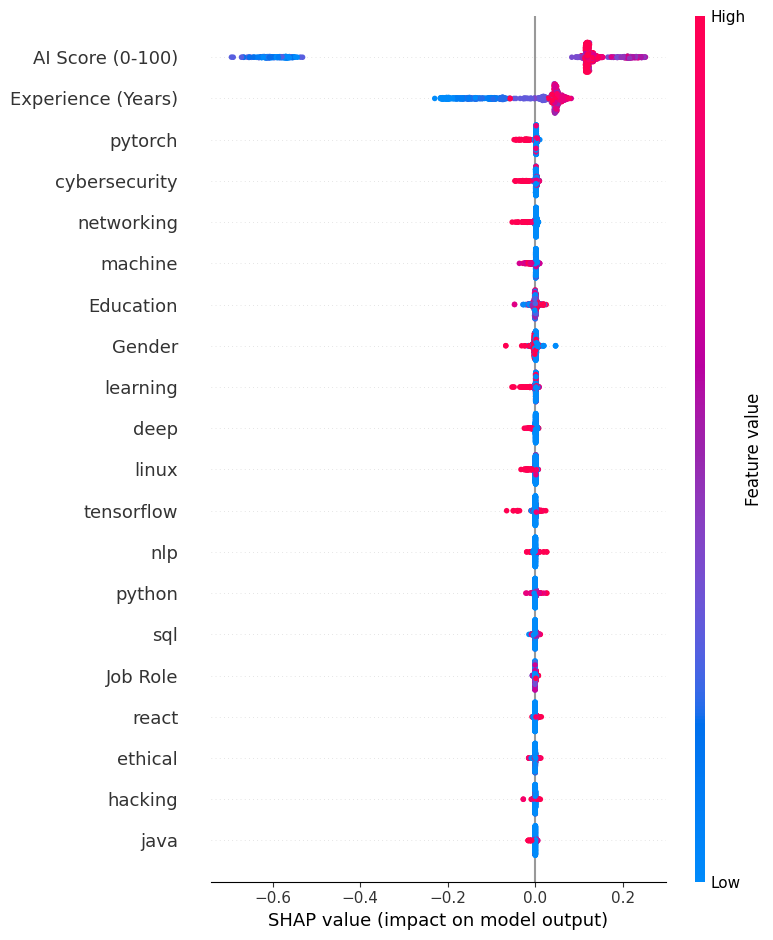

In [ ]:
import shap
import matplotlib.pyplot as plt

# Create SHAP Explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values[:, :, 1], X_train)


In [ ]:
print("Shape of shap_values:", len(shap_values), shap_values[0].shape)
print("Shape of X_train:", X_train.shape)

Shape of shap_values: 800 (20, 2)
Shape of X_train: (800, 20)


In [ ]:
df["Gender"].value_counts(normalize=True) * 100  # Percentage of each gender

,proportion
Gender,
0.0,50.3
1.0,49.7


In [ ]:
!pip install lime
!pip install plotly
!pip install scikit-learn


In [ ]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
explainer = LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=['Reject', 'Hire'], discretize_continuous=True)

exp = explainer.explain_instance(X_test.values[0], rf_model.predict_proba, num_features=4)

print(exp.as_list())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[('97.50 < AI Score (0-100) <= 100.00', 0.3567244436545653), ('Experience (Years) > 8.00', 0.034829459729501536), ('deep <= 0.00', 0.020829887582418983), ('0.00 < Gender <= 1.00', -0.01854042220734419)]


In [ ]:
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

fig = px.bar(feature_importances, x='Feature', y='Importance', title='Feature Importances')
fig.show()


In [ ]:
# ----- More Robust Bias Analysis -----

# 1. Calculate Hiring Rates by Gender (Corrected and more robust)

# Group by Gender and Recruiter Decision, then count occurrences
gender_hiring = df.groupby(['Gender', 'Recruiter Decision']).size().unstack(fill_value=0)

# Calculate hiring rates for each gender
gender_hiring['Total'] = gender_hiring[0] + gender_hiring[1]
gender_hiring['Hiring Rate'] = gender_hiring[1] / gender_hiring['Total']

# Print the hiring rates
print(gender_hiring[['Hiring Rate']])

# 2. Visualize Hiring Rates by Gender (Corrected)
fig = px.bar(gender_hiring, x=gender_hiring.index.map({0: 'Female', 1: 'Male'}), y='Hiring Rate',
             title='Hiring Rates by Gender')
fig.show()

# 3. Statistical Significance Test (Chi-Square) - Optional but Highly Recommended
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Recruiter Decision'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a statistically significant association between Gender and Recruiter Decision.")
else:
    print("There is no statistically significant association between Gender and Recruiter Decision.")

Recruiter Decision  Hiring Rate
Gender                         
0.0                    0.809145
1.0                    0.812877


Chi-Square Statistic: 0.004892927272411698
P-value: 0.9442338843103683
There is no statistically significant association between Gender and Recruiter Decision.


In [ ]:
# Handle potential ZeroDivisionError
if len(male_data) > 0:
    male_hired = male_data[male_data['Recruiter Decision'] == 1].shape[0] / male_data.shape[0]
else:
    male_hired = 0  # Or some other appropriate default value

if len(female_data) > 0:
    female_hired = female_data[female_data['Recruiter Decision'] == 1].shape[0] / female_data.shape[0]
else:
    female_hired = 0  # Or some other appropriate default value

bias_score = abs(male_hired - female_hired)
print("Bias Score:", bias_score)

Bias Score: 0


In [ ]:
# --- Feature-Specific Bias Analysis ---
def analyze_bias(df, feature_col, model=None, X_test=None):  #Model and X_test are optional

# 1. Analyze Bias by Gender
  analyze_bias(df, 'Gender',model,X_test)

  # 2. Analyze Bias by Education
  analyze_bias(df, 'Education')

  # 3. Analyze Bias by Job Role
  analyze_bias(df, 'Job Role')

    # 4. Analyze Bias by AI Score
  analyze_bias(df, 'AI Score (0-100)')

  # 5. Analyze Bias by Experience
  analyze_bias(df, 'Experience (Years)')

# --- Bias Analysis for Skills (More Complex) ---
# Skills are more complex because they are comma-separated strings.  We need to do some extra work.


In [ ]:
# ✅ STEP 1: Install Required Libraries
!pip install lime shap seaborn matplotlib scikit-learn pandas numpy --quiet

# ✅ STEP 2: Import Necessary Libraries
import numpy as np
import pandas as pd
import shap
import lime
import lime.lime_tabular
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import chi2_contingency

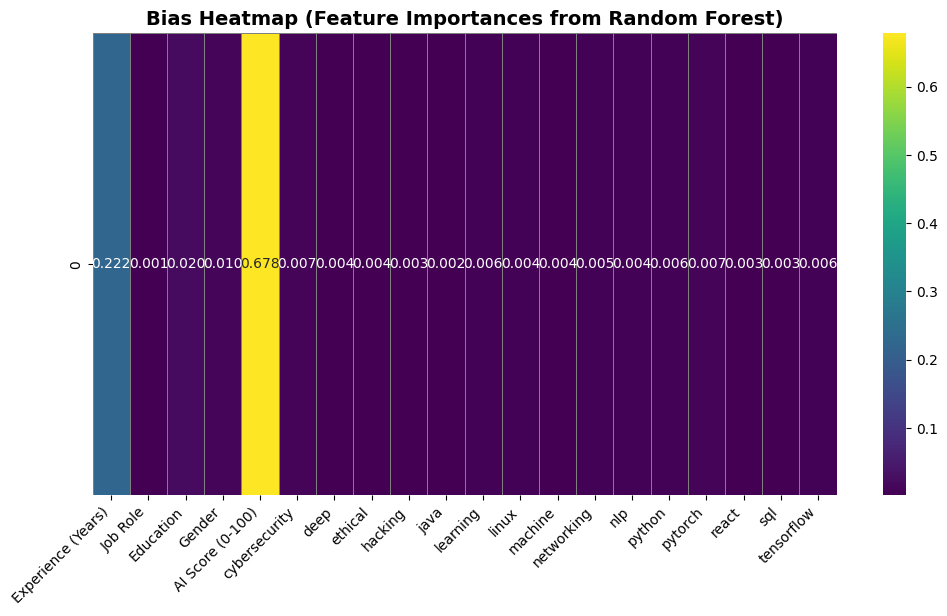

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance scores from Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)

# Create a DataFrame to ensure correct heatmap structure
feature_importance_df = feature_importance.to_frame().T  # Transpose to make it horizontal

# Set up the figure
plt.figure(figsize=(12, 6))  # Make it wider for better visibility

# Generate the heatmap
sns.heatmap(
    feature_importance_df,
    cmap='viridis',  # Better color contrast
    annot=True, fmt=".3f",  # Show numbers with 3 decimal places
    linewidths=0.5, linecolor='gray',  # Add gridlines for better separation
    cbar=True,  # Show color bar
    annot_kws={"size": 10}  # Increase text size
)

# Improve title and labels
plt.title('Bias Heatmap (Feature Importances from Random Forest)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)

# Show the heatmap
plt.show()

